In [ ]:
import duckdb
import pandas as pd 
import os

con = duckdb.connect("qttr.db")

pd.set_option('display.max_columns', None)

#einranken = con.execute('SELECT * FROM "Einranken" ').fetchdf()
einranken = pd.read_csv(os.path.join('data', 'Einranken'))
einranken

,InterneNr,Nachname,Vorname,GeschlechtImSpielbetrieb,Geburtsdatum,Einstufungsdatum zuletzt,TTR,Anzahl Einzel gesamt,Einstufungsart zuletzt,Nation,Altersklasse,Spielklasse,Einstufungswert zuletzt,TTR_Q1,Einzel_Q1,TTR_Q2,Einzel_Q2,TTR_Q3,Einzel_Q3,TTR_Q4,Einzel_Q4,TTR_Q0,Einzel_Q0
0,NU2498935,Sun,Yang,M,2008-02-28,2023-03-27,2605,126,T,CHN,nan,nan,2402,2327.0,63.0,2338.0,78.0,2383.0,98.0,2437.0,125.0,2312.0,63.0
1,NU2379770,Wang,Chen Ce,M,2003-04-14,2022-06-07,2542,32,T,CHN,nan,nan,2638,2527.0,17.0,2509.0,20.0,2454.0,29.0,2463.0,32.0,2527.0,17.0
2,NU2617607,Zhai,Jiale,M,2008-10-24,2023-08-28,2538,44,T,CHN,nan,nan,2318,2342.0,40.0,2348.0,44.0,2498.0,44.0,2518.0,44.0,2326.0,40.0
3,NU2379684,Kuo,Guan-Hong,M,2008-10-24,2022-05-24,2527,199,T,TPE,nan,nan,2175,2157.0,47.0,2173.0,47.0,2189.0,47.0,2247.0,70.0,2084.0,14.0
4,NU2425927,Yan,Yutong,W,2008-01-18,2022-09-10,2519,96,T,CHN,nan,nan,2552,2418.0,23.0,2281.0,74.0,2297.0,74.0,2306.0,88.0,2449.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52593,NU2261885,Zhang,Katherina,W,2013-04-26,2021-10-24,633,17,T,GER,nan,nan,650,616.0,11.0,615.0,17.0,621.0,17.0,627.0,17.0,610.0,11.0
52594,NU2227997,Ziehn,Tristan,M,2009-02-01,2020-09-19,691,10,P,GER,nan,nan,795,709.0,5.0,715.0,5.0,721.0,5.0,667.0,10.0,703.0,5.0
52595,NU2228122,Zörner,Christian,M,2008-05-03,2020-09-26,821,25,P,GER,Jungen 19,Kreisliga D Nachwuchs,810,738.0,7.0,744.0,7.0,750.0,7.0,740.0,11.0,732.0,7.0
52596,NU2237990,Zuber,Mariella,W,2010-04-28,2021-10-03,819,25,P,GER,nan,nan,776,748.0,13.0,832.0,22.0,838.0,22.0,795.0,25.0,742.0,13.0


In [3]:
statisch = einranken[einranken["Einstufungsart zuletzt"] == "S"] #leer, veraltet - erste initalisierungen
tunier = einranken[einranken["Einstufungsart zuletzt"] == "T"]
meldepos = einranken[einranken["Einstufungsart zuletzt"] == "P"]

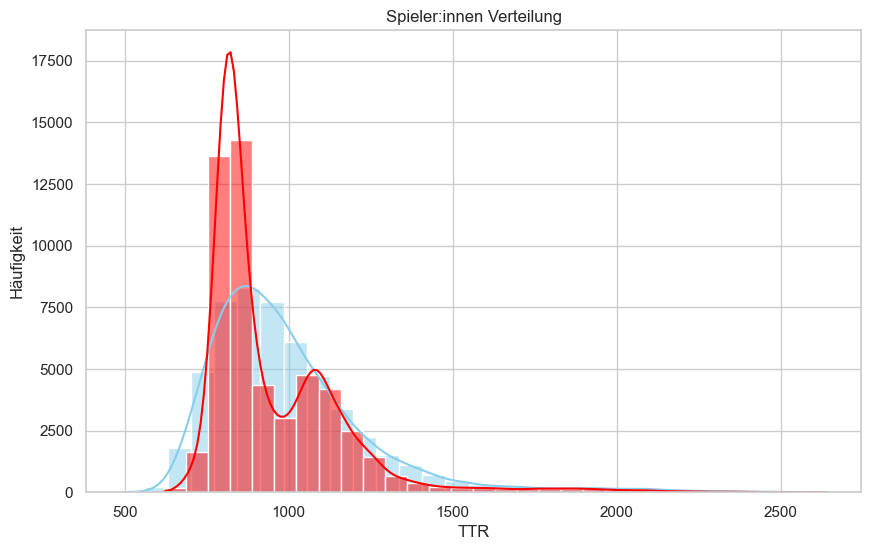

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze ein ansprechendes Style-Theme
sns.set_theme(style="whitegrid")

# Erstelle Histogramm + Dichtekurve
plt.figure(figsize=(10, 6))
sns.histplot(einranken["TTR"], kde=True, bins=30, color='skyblue')
sns.histplot(einranken["Einstufungswert zuletzt"], kde=True, bins=30, color='red')

plt.title("Spieler:innen Verteilung")
plt.xlabel("TTR")
plt.ylabel("Häufigkeit")
plt.show()


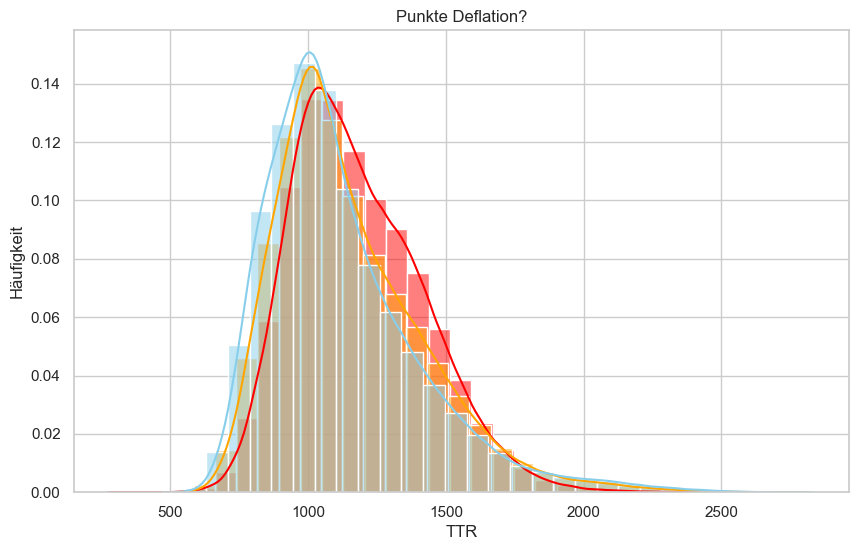

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

y2011 = con.execute("SELECT TTR FROM 'q-ttr-liste_20120211_komplett'").fetchdf()
y2018 = con.execute("SELECT TTR FROM 'q-ttr-liste_20180811_komplett'").fetchdf()
y2025 = con.execute("SELECT TTR FROM 'q-ttr-liste_20250211_komplett'").fetchdf()

# Setze ein ansprechendes Style-Theme
sns.set_theme(style="whitegrid")

# Erstelle Histogramm + Dichtekurve
plt.figure(figsize=(10, 6))
sns.histplot(y2011, x="TTR", kde=True, bins=30, stat="probability", color='red', label='2012', alpha=0.5)
sns.histplot(y2018, x="TTR", kde=True, bins=30, stat="probability", color='orange', label='2018', alpha=0.5)
sns.histplot(y2025, x="TTR", kde=True, bins=30, stat="probability", color='skyblue', label='2025', alpha=0.5)



plt.title("Punkte Deflation?")
plt.xlabel("TTR")
plt.ylabel("Häufigkeit")
plt.show()


In [6]:
compare = {"2011" : y2011, "2018": y2018, "2025": y2025} 

for i in compare:
    print(f"{i}: \n Min: {compare[i]['TTR'].min()} \n Median: {int(compare[i]['TTR'].median())} \n Max: {compare[i]['TTR'].max()} \n \n")

2011: 
 Min: 277 
 Median: 1149 
 Max: 2598 
 

2018: 
 Min: 508 
 Median: 1095 
 Max: 2816 
 

2025: 
 Min: 473 
 Median: 1058 
 Max: 2834 
 



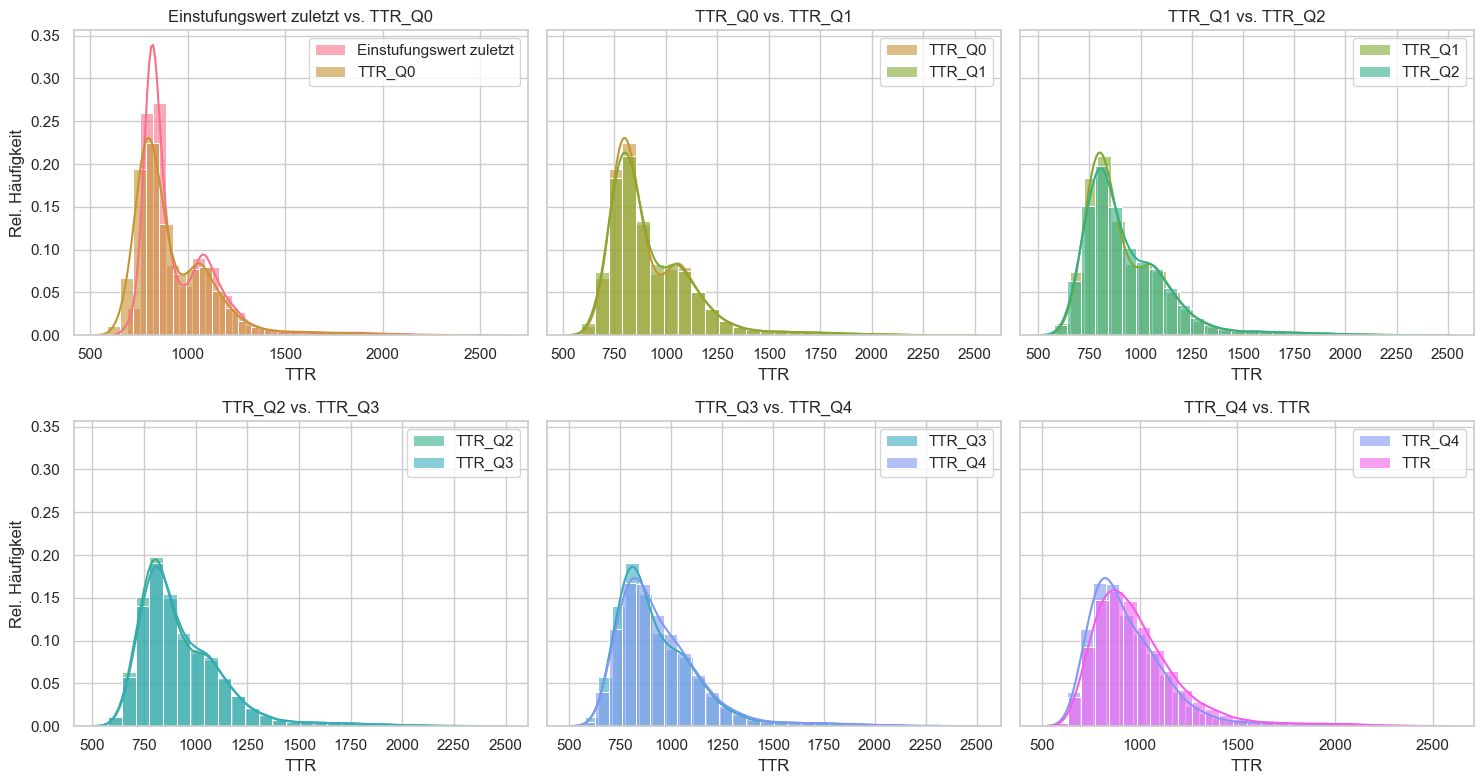

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set_theme(style="whitegrid")

# Relevante Spalten
spalten = [
    "Einstufungswert zuletzt",
    "TTR_Q0", "TTR_Q1", "TTR_Q2", "TTR_Q3", "TTR_Q4", "TTR"
]

# Farben fix pro Spalte
farben = sns.color_palette("husl", n_colors=len(spalten))
farben_dict = {spalte: farbe for spalte, farbe in zip(spalten, farben)}

# Alle Paarungen vorbereiten
paare = [(spalten[i], spalten[i + 1]) for i in range(len(spalten) - 1)]


n_cols = 3
n_rows = -(-len(paare) // n_cols)  # Decken auf ganze Zahl auf

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharey=True)

# Falls axes 1D ist → flatten
axes = axes.flatten()

# Schleife über alle Paarungen
for idx, (spalte1, spalte2) in enumerate(paare):
    ax = axes[idx]
    
    sns.histplot(einranken[spalte1], kde=True, bins=30, stat="probability",
                 color=farben_dict[spalte1], label=spalte1, alpha=0.6, ax=ax)
    
    sns.histplot(einranken[spalte2], kde=True, bins=30, stat="probability",
                 color=farben_dict[spalte2], label=spalte2, alpha=0.6, ax=ax)
    
    ax.set_title(f"{spalte1} vs. {spalte2}")
    ax.set_xlabel("TTR")
    ax.set_ylabel("Rel. Häufigkeit")
    ax.legend()

# Leere Achsen (falls z. B. nur 5 Paare, aber 8 Plätze)
for j in range(len(paare), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


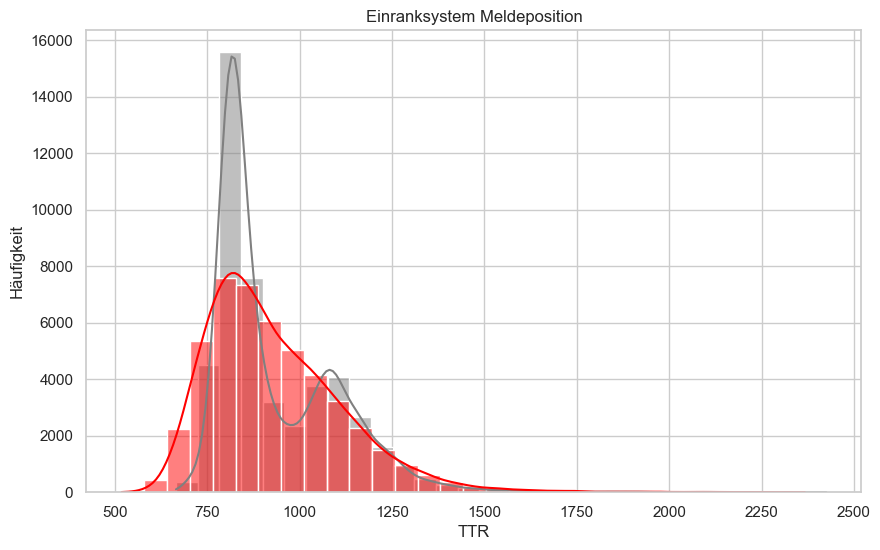

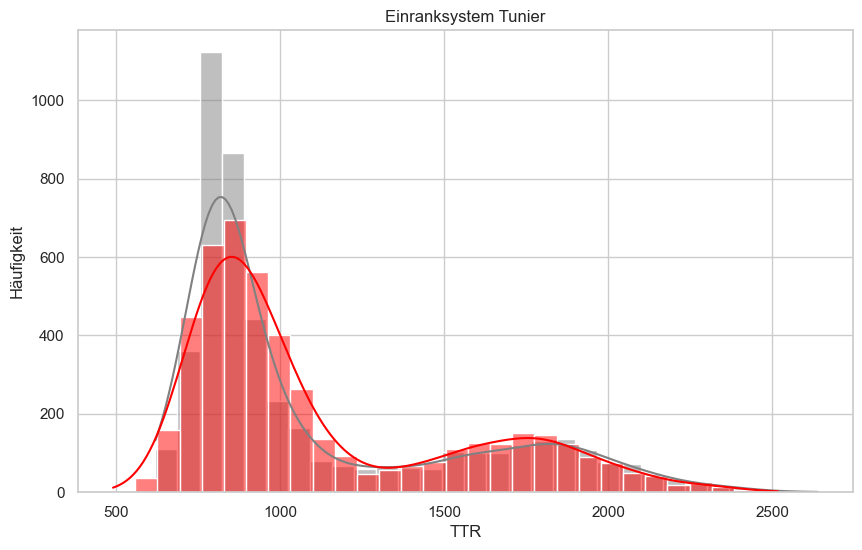

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

art = {"Meldeposition" : meldepos,"Tunier" : tunier}

# Setze ein ansprechendes Style-Theme
sns.set_theme(style="whitegrid")
for i in art:
    # Erstelle Histogramm + Dichtekurve
    plt.figure(figsize=(10, 6))
    sns.histplot(art[i]["Einstufungswert zuletzt"], kde=True, bins=30, color='gray')
    sns.histplot(art[i]["TTR_Q4"], kde=True, bins=30, color='red')
    plt.title(f"Einranksystem {i}")
    plt.xlabel("TTR")
    plt.ylabel("Häufigkeit")
    plt.show()
    





In [9]:
einranken.columns

Index(['InterneNr', 'Nachname', 'Vorname', 'GeschlechtImSpielbetrieb',
       'Geburtsdatum', 'Einstufungsdatum zuletzt', 'TTR',
       'Anzahl Einzel gesamt', 'Einstufungsart zuletzt', 'Nation',
       'Altersklasse', 'Spielklasse', 'Einstufungswert zuletzt', 'TTR_Q1',
       'Einzel_Q1', 'TTR_Q2', 'Einzel_Q2', 'TTR_Q3', 'Einzel_Q3', 'TTR_Q4',
       'Einzel_Q4', 'TTR_Q0', 'Einzel_Q0'],
      dtype='object')

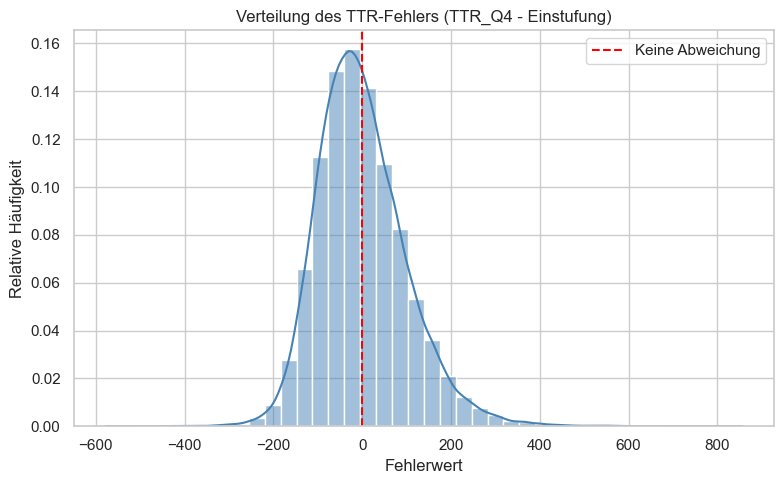

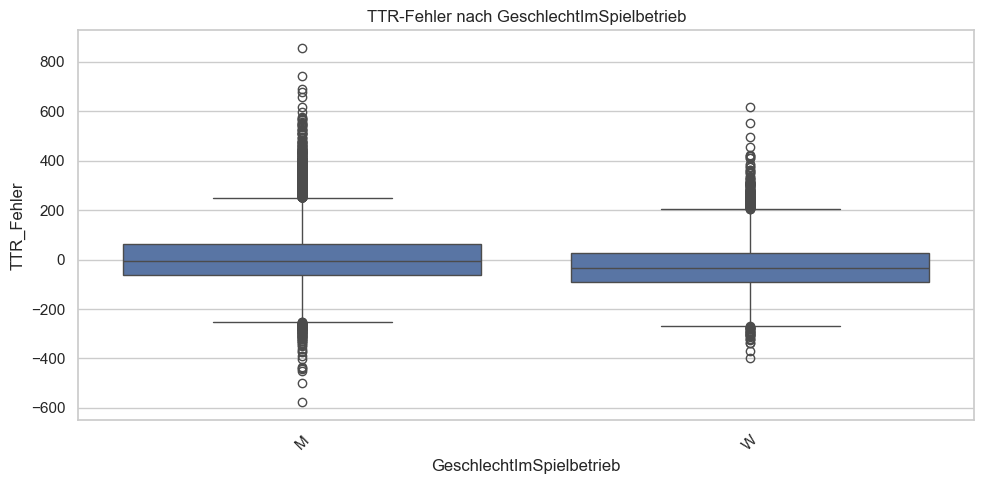

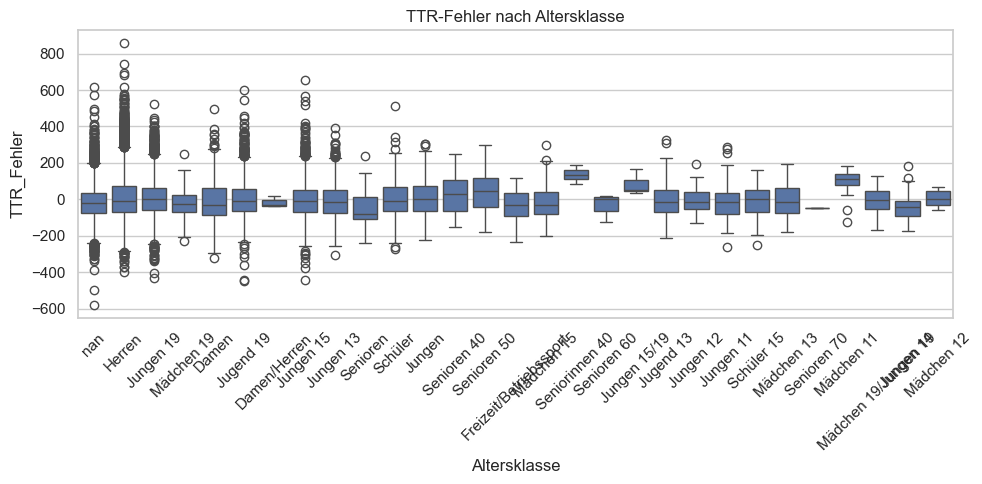

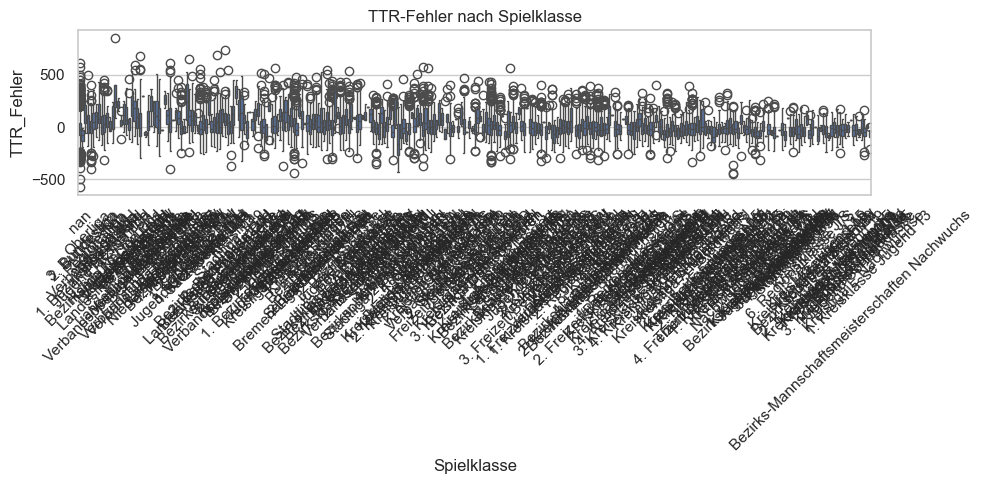

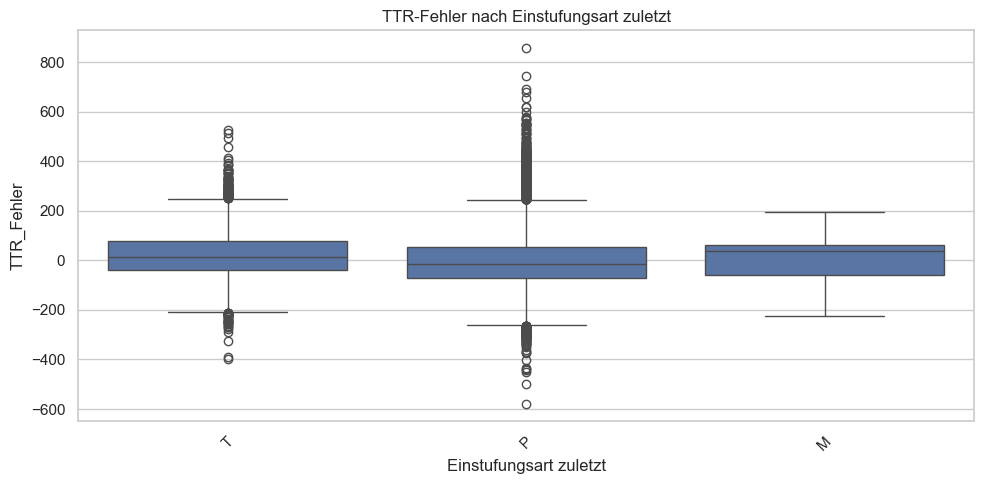

                            OLS Regression Results                            
Dep. Variable:             TTR_Fehler   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     18.91
Date:                Fri, 16 May 2025   Prob (F-statistic):               0.00
Time:                        21:49:58   Log-Likelihood:            -2.4140e+05
No. Observations:               40299   AIC:                         4.834e+05
Df Residuals:                   39986   BIC:                         4.861e+05
Df Model:                         312                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

C:\Users\nicla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


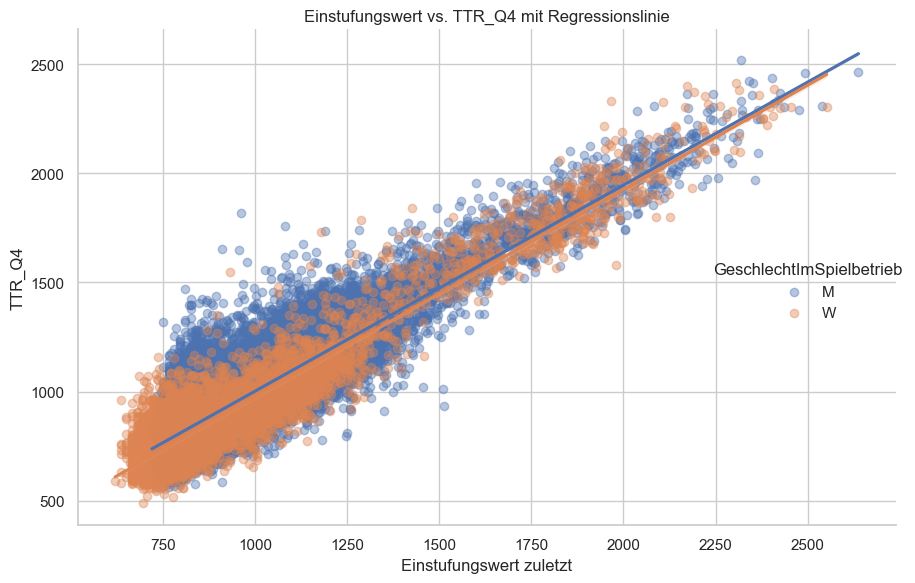

In [10]:
if True:    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from scipy.stats import ttest_ind

    # Schritt 1: Fehler berechnen
    einranken["TTR_Fehler"] = einranken["TTR_Q4"] - einranken["Einstufungswert zuletzt"]

    # Schritt 2: Verteilung des Fehlers
    plt.figure(figsize=(8, 5))
    sns.histplot(einranken["TTR_Fehler"], bins=40, kde=True, color="steelblue", stat="probability")
    plt.title("Verteilung des TTR-Fehlers (TTR_Q4 - Einstufung)")
    plt.xlabel("Fehlerwert")
    plt.ylabel("Relative Häufigkeit")
    plt.axvline(0, color='red', linestyle='--', label="Keine Abweichung")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Schritt 3: Boxplots nach Gruppen
    gruppenvariablen = [
        'GeschlechtImSpielbetrieb',
        'Altersklasse',
        'Spielklasse',
        'Einstufungsart zuletzt'
    ]

    for var in gruppenvariablen:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=var, y="TTR_Fehler", data=einranken)
        plt.title(f"TTR-Fehler nach {var}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Schritt 4: Lineares Regressionsmodell (Dummy-Kodierung automatisch)
    modell = smf.ols(
        "TTR_Fehler ~ C(GeschlechtImSpielbetrieb) + C(Altersklasse) + C(Spielklasse) + C(Q('Einstufungsart zuletzt'))",
        data=einranken
    ).fit()

    print(modell.summary())

    # Schritt 5: t-Test (Beispiel: Geschlecht m vs w)
    gruppe_m = einranken[einranken["GeschlechtImSpielbetrieb"] == "m"]["TTR_Fehler"]
    gruppe_w = einranken[einranken["GeschlechtImSpielbetrieb"] == "w"]["TTR_Fehler"]

    t_test_ergebnis = ttest_ind(gruppe_m.dropna(), gruppe_w.dropna(), equal_var=False)
    print("\nT-Test Ergebnis (m vs. w):", t_test_ergebnis)

    # Optional: Streudiagramm mit Regression
    sns.lmplot(x="Einstufungswert zuletzt", y="TTR_Q4", hue="GeschlechtImSpielbetrieb", data=einranken,
            height=6, aspect=1.2, scatter_kws={"alpha": 0.4})
    plt.title("Einstufungswert vs. TTR_Q4 mit Regressionslinie")
    plt.tight_layout()
    plt.show()



In [11]:
if True:
    # Ergebnisse aus Tabelle 1 (Koeffizienten-Tabelle)
    regression_alot = modell.summary2().tables[1].copy()

    '''
    # Optional: Signifikanzsterne hinzufügen
    def significance_stars(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return ''

    results_df["Signifikanz"] = results_df["P>|t|"].apply(significance_stars)
    '''

    # Jetzt hast du ein sauberes DataFrame mit allen Resultaten
regression_alot.sort_values("P>|t|")

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
C(GeschlechtImSpielbetrieb)[T.W],-26.356350,1.492281,-17.661790,1.518440e-69,-29.281256,-23.431445
C(Altersklasse)[T.Herren],94.594878,5.819089,16.255959,3.140545e-59,83.189327,106.000429
C(Spielklasse)[T.Hamburg Liga D/H],327.657826,50.016043,6.551054,5.782413e-11,229.625215,425.690438
C(Spielklasse)[T.Bezirksliga D/H],125.876210,19.677030,6.397114,1.600874e-10,87.308772,164.443648
C(Spielklasse)[T.3. Kreisklasse (3er)],-92.002719,14.518198,-6.337062,2.366773e-10,-120.458726,-63.546712
...,...,...,...,...,...,...
C(Spielklasse)[T.Bremen-Liga Damen/Herren],-12.876776,57.309229,-0.224689,8.222221e-01,-125.204200,99.450649
C(Spielklasse)[T.Kreisliga/ Herren],7.039081,34.516431,0.203934,8.384060e-01,-60.613928,74.692089
C(Spielklasse)[T.Kreisliga D/H],-2.487616,12.970955,-0.191784,8.479127e-01,-27.910990,22.935759
C(Spielklasse)[T.1. Stadtklasse D/H],4.683881,27.799050,0.168491,8.661981e-01,-49.802905,59.170666


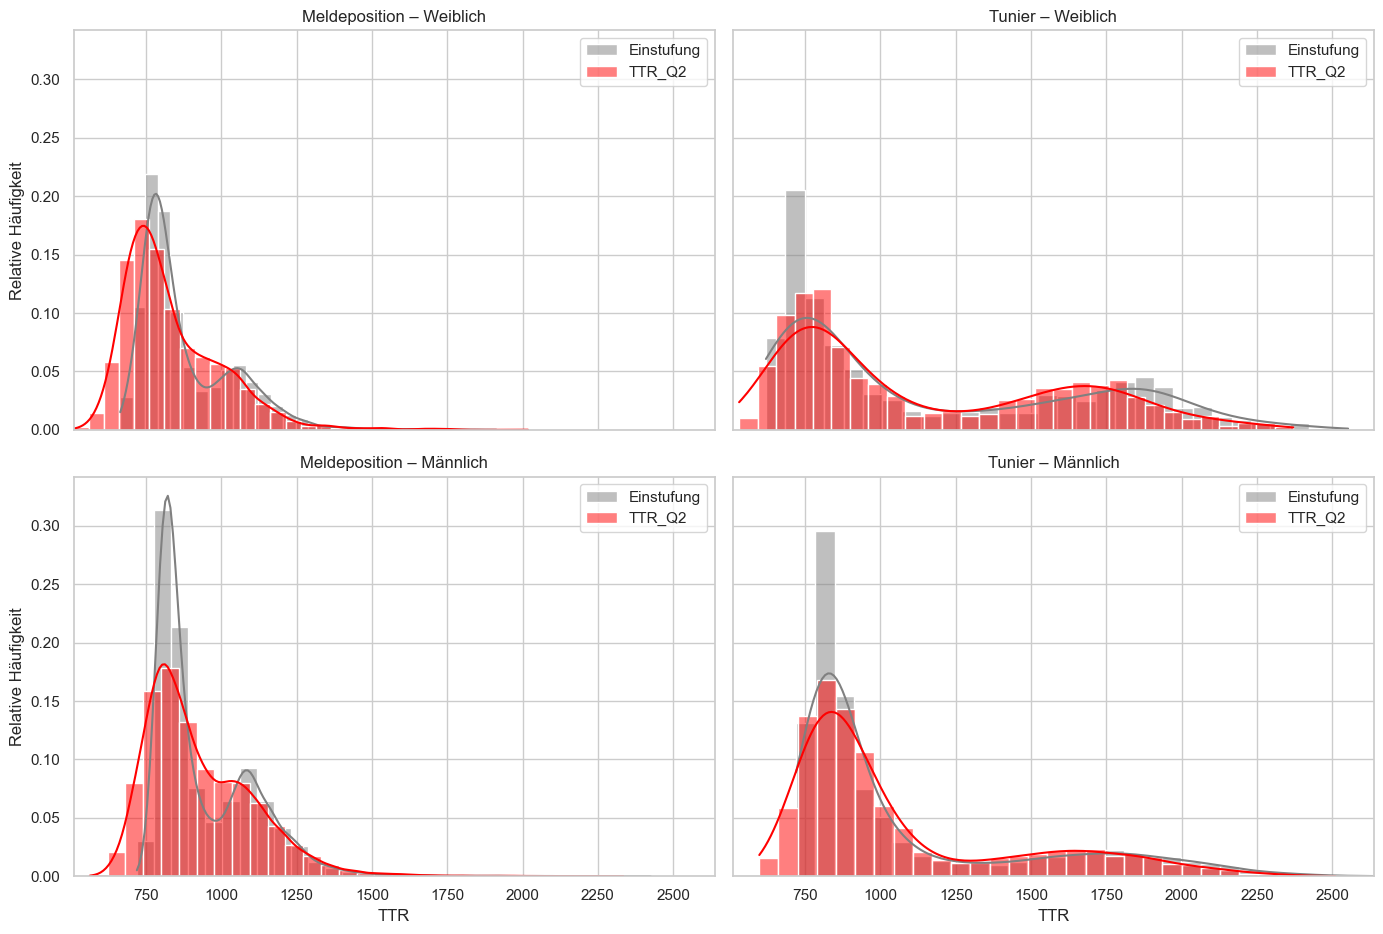

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionaries mit DataFrames und Bezeichnungen
art = {"Meldeposition": meldepos, "Tunier": tunier}
geschlechter = {"W": "Weiblich", "M": "Männlich"}

# Setze einheitliches Seaborn-Theme
sns.set_theme(style="whitegrid")

# 2x2 Subplots mit gemeinsamem X- und Y-Skalierung
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Bestimme globalen X-Achsenbereich (über beide Systeme und Geschlechter hinweg)
all_values = []
for df in art.values():
    for geschl_code in geschlechter:
        df_filt = df[df["GeschlechtImSpielbetrieb"] == geschl_code]
        all_values.extend(df_filt["Einstufungswert zuletzt"].dropna())
        all_values.extend(df_filt["TTR_Q2"].dropna())

xmin = min(all_values)
xmax = max(all_values)

# Schleife über Systeme und Geschlechter
for col_idx, (art_name, df) in enumerate(art.items()):
    for row_idx, (geschl_code, geschl_name) in enumerate(geschlechter.items()):
        ax = axs[row_idx, col_idx]
        df_filtered = df[df["GeschlechtImSpielbetrieb"] == geschl_code]

        sns.histplot(df_filtered["Einstufungswert zuletzt"], kde=True, bins=30, 
                     stat="probability", color='gray', ax=ax, label="Einstufung")
        sns.histplot(df_filtered["TTR_Q2"], kde=True, bins=30, 
                     stat="probability", color='red', ax=ax, label="TTR_Q2")

        ax.set_xlim(xmin, xmax)  # X-Achse fixieren
        ax.set_title(f"{art_name} – {geschl_name}")
        ax.set_xlabel("TTR")
        ax.set_ylabel("Relative Häufigkeit")
        ax.legend()

# Layout anpassen
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


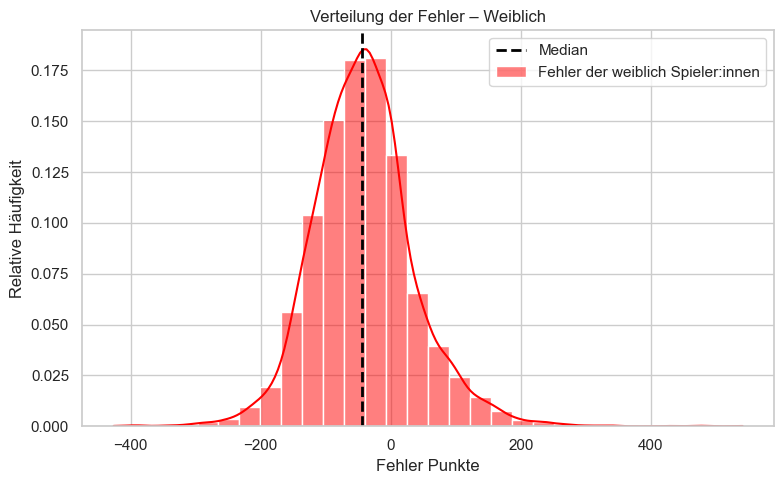

 Median hier: -44.0
 Mittelwert hier: -41.465418043824215


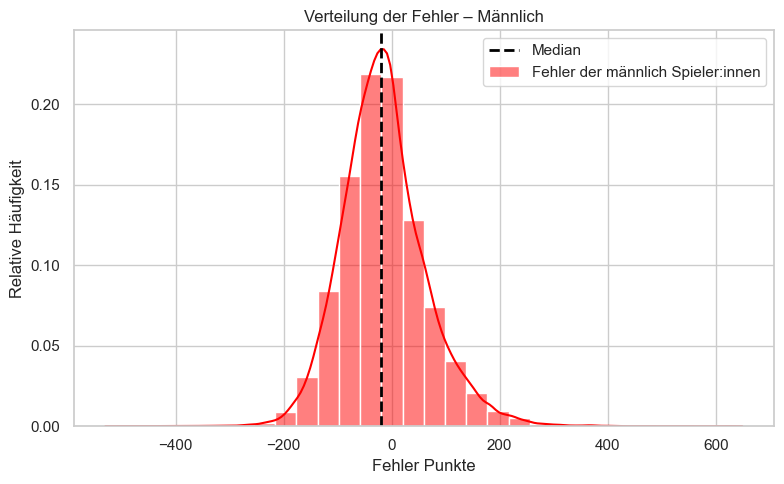

 Median hier: -20.0
 Mittelwert hier: -14.650633595174323


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

weiblich = einranken[einranken["GeschlechtImSpielbetrieb"] == "W"]
maennlich = einranken[einranken["GeschlechtImSpielbetrieb"] == "M"]

fehler_W = weiblich["TTR_Q2"] - weiblich["Einstufungswert zuletzt"]
fehler_M = maennlich["TTR_Q2"] - maennlich["Einstufungswert zuletzt"]

ges = {"weiblich": fehler_W, "männlich": fehler_M}

for i in ges:
    # Neue Figur und Achse erstellen
    fig, ax = plt.subplots(figsize=(8, 5))

    # Histogramm
    sns.histplot(ges[i], kde=True, bins=30, stat="probability", color='red', ax=ax, label=f"Fehler der {i} Spieler:innen")

    # Median-Linie
    ax.axvline(ges[i].median(), color="black", linestyle="--", linewidth=2, label="Median")

    # Achsenbeschriftung etc.
    ax.set_ylabel("Relative Häufigkeit")
    ax.set_xlabel(f"Fehler Punkte")
    ax.set_title(f"Verteilung der Fehler – {i.capitalize()}")
    ax.legend()

    plt.tight_layout()
    plt.show()
    print(f" Median hier: {ges[i].median()}")
    print(f" Mittelwert hier: {ges[i].mean()}")
